# My portfolios

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from etfs.portfolio import portfolio
from etfs.portfolio.io import import_portfolio, import_vanguard_portfolio
from etfs.stats.basics import resample_df, runrate_column, shift_column, return_column, difference, rsq

## RobinHood

In [42]:
rh = import_portfolio(path="../data/portfolio_rh.csv", name="RobinHood")

adding CHK
Cash balance: 550.00 USD
adding BABA
adding AAPL
adding MSFT
Cash balance: 1.13 USD
Cash balance: 551.13 USD
adding W
Cash balance: 24.10 USD
adding DB
removing CHK
Cash balance: 1.13 USD
Cash balance: 1.38 USD
Cash balance: 2.22 USD
Cash balance: 552.22 USD
adding JD
removing DB
adding IQ
adding AMD
Cash balance: 220.74 USD
Cash balance: 185.56 USD


In [43]:
rh.overview()

        Quantity    AvgPrice   LastPrice  TradeValue  CurrentValue  Dividends  \
Ticker                                                                          
AAPL         1.0  167.680000  191.330002      167.68    191.330002        0.0   
AMD         17.0   16.825882   16.270000      286.04    276.590008        0.0   
BABA         1.0  193.340000  190.039993      193.34    190.039993        0.0   
IQ          18.0   36.631111   33.950001      659.36    611.100014        0.0   
JD           6.0   42.000000   38.270000      252.00    229.620003        0.0   
MSFT         2.0   94.240000  105.430000      188.48    210.860001        0.0   
W            5.0   59.990000  119.169998      299.95    595.849991        0.0   

            Return  
Ticker              
AAPL     23.650002  
AMD      -9.449992  
BABA     -3.300007  
IQ      -48.259986  
JD      -22.379997  
MSFT     22.380001  
W       295.899991  

Total portfolio value:	 2310.41 USD
Total security value:	 2305.39 USD
Cash in w

In [44]:
rh.positions()

        Quantity  Bought  Sold  CurrentValue  Invested  Devested  Dividends  \
Ticker                                                                        
IQ          18.0    18.0   0.0    611.100014    659.36      0.00        0.0   
W            5.0     7.0   2.0    595.849991    527.87    227.92        0.0   
AMD         17.0    17.0   0.0    276.590008    286.04      0.00        0.0   
JD           6.0     6.0   0.0    229.620003    252.00      0.00        0.0   
MSFT         2.0     2.0   0.0    210.860001    188.48      0.00        0.0   
AAPL         1.0     1.0   0.0    191.330002    167.68      0.00        0.0   
BABA         1.0     1.0   0.0    190.039993    193.34      0.00        0.0   
DB           0.0     2.0   2.0      0.000000     27.40     22.28        0.0   
CHK          0.0     1.0   1.0      0.000000      0.00      3.70        0.0   

            Return  PercentGrowth  
Ticker                             
IQ      -48.259986      -7.319217  
W       295.899991    

In [45]:
rh.get_timeseries()

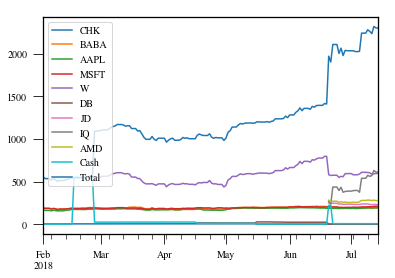

In [46]:
rh.timeseries.plot(x=rh.timeseries.index, y=rh.timeseries.columns)

In [47]:
# Volatility of portfolio
df_volatility = return_column(rh.timeseries, column='Total', window=1, shift=1)

Average volatility of 'Total' is 0.04868617712323294


In [48]:
rh.get_benchmark()

In [49]:
df_volatility = return_column(rh.benchmark.data, column='Close', window=1, shift=1)

Average volatility of 'Close' is 0.010854917298914286


In [50]:
total = portfolio.total(name="Total", data=rh.timeseries) # to-do: turn this into portfolio object

In [51]:
rsq(total, rh.benchmark, col1='Total', col2='Close')

0.21497174606297595

## Vanguard

In [52]:
vg = import_vanguard_portfolio(path="../data/portfolio_vanguard.csv", name="Vanguard")

Cash balance: 5500.00 USD
Cash balance: 5502.23 USD
Cash balance: 5507.58 USD
adding VOO
adding VO
adding VGK
adding VB
Cash balance: 38.88 USD
Cash balance: 5538.88 USD
Cash balance: 38.60 USD
Cash balance: 38.59 USD
Cash balance: 38.55 USD
Cash balance: 38.60 USD
Cash balance: 38.71 USD
Cash balance: 38.69 USD
Cash balance: 38.74 USD
Cash balance: 38.79 USD
Cash balance: 3038.79 USD
Cash balance: 3042.24 USD
Cash balance: 3043.93 USD
Cash balance: 3090.76 USD
Cash balance: 3038.79 USD
Cash balance: 3039.54 USD


In [53]:
vg.overview()     

        Quantity    AvgPrice   LastPrice   TradeValue  CurrentValue  \
Ticker                                                                
VB         9.050  150.410014  159.880005  1361.210628   1446.914044   
VGK       43.036   60.723416   57.080002  2613.292911   2456.494959   
VO         3.021  158.275511  161.889999   478.150320    489.069688   
VOO       26.117  253.483379  256.790009  6620.225417   6706.584653   

        Dividends      Return  
Ticker                         
VB           7.55   93.253416  
VGK         58.51  -98.287952  
VO           3.23   14.149369  
VOO         28.18  114.539236  

Total portfolio value:	14138.60 USD
Total security value:	11099.06 USD
Cash in wallet:		 3039.54 USD
Total return:		  138.60 USD	(0.98%)


In [54]:
vg.positions()

        Quantity  Bought  Sold  CurrentValue     Invested  Devested  \
Ticker                                                                
VOO       26.117  26.117   0.0   6706.584653  6620.225417       0.0   
VGK       43.036  43.036   0.0   2456.494959  2613.292911       0.0   
VB         9.050   9.050   0.0   1446.914044  1361.210628       0.0   
VO         3.021   3.021   0.0    489.069688   478.150320       0.0   

        Dividends      Return  PercentGrowth  
Ticker                                        
VOO         28.18  114.539236       1.730141  
VGK         58.51  -98.287952      -3.761077  
VB           7.55   93.253416       6.850770  
VO           3.23   14.149369       2.959188  


In [55]:
vg.get_timeseries()

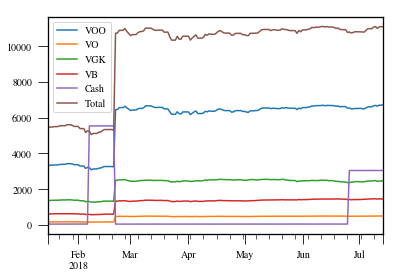

In [59]:
vg.timeseries.plot(x=vg.timeseries.index, y=vg.timeseries.columns)

In [60]:
vg.get_benchmark()

In [74]:
# Volatility of portfolio
df_volatility = return_column(vg.timeseries, column='Total', window=1, shift=1)

Average volatility of 'Total' is 0.038693222094081645


In [61]:
df_volatility = return_column(vg.benchmark.data, column='Close', window=1, shift=1)

Average volatility of 'Close' is 0.010503431051184146


In [62]:
total = portfolio.total(name="Total", data=vg.timeseries) # to-do: turn this into portfolio object

In [63]:
rsq(total, vg.benchmark, col1='Total', col2='Close')  #hm, doesn't look right

0.048961611937420893

## Another Vanguard

In [64]:
vg_2 = import_vanguard_portfolio(path="../data/portfolio_vanguard_2.csv", name="Vanguard")

Cash balance: 5500.00 USD
Cash balance: 5501.12 USD
Cash balance: 5506.47 USD
adding BNDX
adding VAW
adding VCLT
adding VDC
adding VGK
adding VNQI
adding VPL
adding VWO
adding VNQ
Cash balance: 22.53 USD
Cash balance: 22.53 USD
Cash balance: 22.51 USD
Cash balance: 5522.51 USD
Cash balance: 22.75 USD
Cash balance: 22.74 USD
Cash balance: 22.74 USD
Cash balance: 22.69 USD
Cash balance: 25.62 USD
Cash balance: 25.22 USD
Cash balance: 13.47 USD
Cash balance: 22.73 USD
Cash balance: 22.23 USD
Cash balance: 19.43 USD
Cash balance: 22.74 USD
Cash balance: 22.78 USD
Cash balance: 22.78 USD
Cash balance: 22.81 USD
Cash balance: 23.66 USD
Cash balance: 23.70 USD
Cash balance: 22.85 USD
Cash balance: 22.86 USD
Cash balance: 22.87 USD
Cash balance: 33.95 USD
Cash balance: 22.85 USD
Cash balance: 22.83 USD
Cash balance: 22.82 USD
Cash balance: 22.85 USD


In [65]:
vg_2.overview()

        Quantity    AvgPrice   LastPrice   TradeValue  CurrentValue  \
Ticker                                                                
BNDX      20.077   54.120880   54.910000  1086.584915   1102.428067   
VAW        8.022  139.434494  133.029999  1118.543512   1067.166650   
VCLT      12.196   93.212889   89.430000  1136.824396   1090.688284   
VDC        8.032  142.940162  137.139999  1148.095382   1101.508475   
VGK        9.222   60.594282   57.080002   558.800471    526.391777   
VNQ       15.279   76.612456   82.260002  1170.561714   1256.850573   
VNQI      18.022   61.763579   58.310001  1113.103220   1050.862845   
VPL       29.263   74.873573   69.570000  2191.025366   2035.826901   
VWO       32.271   48.381265   42.799999  1561.311792   1381.198775   

        Dividends      Return  
Ticker                         
BNDX         4.18   20.023152  
VAW          2.93  -48.446861  
VCLT        17.58  -28.556112  
VDC          4.29  -42.296907  
VGK         12.53  -19.878

In [66]:
vg_2.positions()

        Quantity  Bought  Sold  CurrentValue     Invested  Devested  \
Ticker                                                                
VPL       29.263  29.263   0.0   2035.826901  2191.025366       0.0   
VWO       32.271  32.271   0.0   1381.198775  1561.311792       0.0   
VNQ       15.279  15.279   0.0   1256.850573  1170.561714       0.0   
BNDX      20.077  20.077   0.0   1102.428067  1086.584915       0.0   
VDC        8.032   8.032   0.0   1101.508475  1148.095382       0.0   
VCLT      12.196  12.196   0.0   1090.688284  1136.824396       0.0   
VAW        8.022   8.022   0.0   1067.166650  1118.543512       0.0   
VNQI      18.022  18.022   0.0   1050.862845  1113.103220       0.0   
VGK        9.222   9.222   0.0    526.391777   558.800471       0.0   

        Dividends      Return  PercentGrowth  
Ticker                                        
VPL         18.54 -136.658465      -6.237192  
VWO         11.64 -168.473017     -10.790479  
VNQ         21.67  107.958858 

In [67]:
vg_2.get_timeseries()

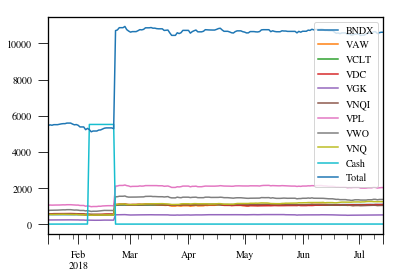

In [70]:
vg_2.timeseries.plot(x=vg_2.timeseries.index, y=vg_2.timeseries.columns)

In [71]:
vg_2.get_benchmark()

In [75]:
# Volatility of portfolio
df_volatility = return_column(vg_2.timeseries, column='Total', window=1, shift=1)

Average volatility of 'Total' is 0.038296832137186


In [73]:
df_volatility = return_column(vg_2.benchmark.data, column='Close', window=1, shift=1)

Average volatility of 'Close' is 0.010503431051184146


In [76]:
total = portfolio.total(name="Total", data=vg_2.timeseries) # to-do: turn this into portfolio object

In [77]:
rsq(total, vg_2.benchmark, col1='Total', col2='Close')  #hm, doesn't look right

0.071984070442556516

In [ ]:
#rsq(vg, vg_2, col1='Total', col2='Close')